In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sys import path
path.append('./../spineSimulator/')
import plot
from simulation_parameters import simulation_parameters

from importlib import reload
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py'>

In [19]:
# text rendering with LaTex
plt.rc('text', usetex=True)
plt.rc('font', family='sans')

In [20]:
(
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_1')

cum_R = np.cumsum(1./g_ij, axis=1)


# Figure 04
compare depolarisation for different time courses of spine current input and dendrite depolarisation.

In [21]:
def get_normalized_NMDAR_conductance(a,b):  
    def g(v):
        return 1. / (1. + a * np.exp(b*v))
    return g

# values taken from Chiu &Carter 2022 FNCellNeuro
g_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=0.073, b=-0.074)

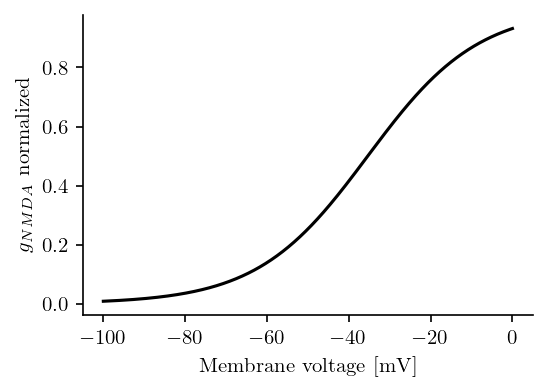

In [22]:
def ax_g_NMDAR(fig, pos, a, b):
    g_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=a, b=b)
    
    v = np.linspace(-100, 0,1000)
    g = g_NMDAR_CA1(v)
    
    ax = fig.add_axes(pos)
    
    ax.plot(v,g, 'k-')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlabel('Membrane voltage [mV]')
    ax.set_ylabel('$g_{NMDA}$ normalized')
    
fig = plt.figure(figsize=(3,2), dpi=150)
pos = [0,0,1,1]
ax_g_NMDAR(fig, pos, 0.073, -0.074)

plt.show()
    

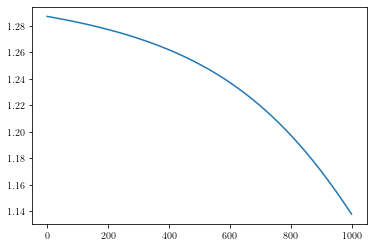

In [23]:
v = np.linspace(-100, -50,1000)
v2 = v+4.
g1 = g_NMDAR_CA1(v)
g2 = g_NMDAR_CA1(v2)
i1 = g1 * v
i2 = g2 * v2
plt.plot(i2/i1)

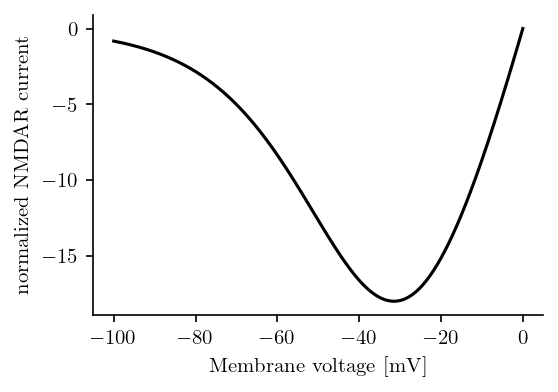

In [24]:
def ax_NMDAR_current(fig, pos, a, b):
    g_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=a, b=b)
    
    v = np.linspace(-100, 0,1000)
    g = g_NMDAR_CA1(v)
    i = v * g
    
    ax = fig.add_axes(pos)
    
    ax.plot(v,i, 'k-')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlabel('Membrane voltage [mV]')
    ax.set_ylabel('normalized NMDAR current')


fig = plt.figure(figsize=(3,2), dpi=150)
pos = [0,0,1,1]
ax_NMDAR_current(fig, pos, 0.073, -0.074)

plt.show()

In [25]:

    


def axs_head_overview(fig, column, n_columns, file_id_list, make_y_label=True, show_domain=True, show_resistance=True):
    from simulation_parameters import simulation_parameters
    
    # create axes for plotting
    dx = 0.05
    wx = (1. - n_columns * dx - 0.5 * dx) / n_columns
    x_min = dx + (wx + dx) * (column - 1)
    x_max = x_min + wx
    n_rows = 7
    if not show_domain:
        n_rows -= 1
    if not show_resistance:
        n_rows -= 1

    dy = 0.05
    wy = (1. - n_rows * dy - 1.3 * dy) / n_rows
    y_min = [dy + (wy + dy) * nr for nr in range(n_rows-1,-1,-1)]
    if not show_domain:
        y_min = [-100] + y_min
    else:
        #ax1 = fig.add_axes([x_min, y_min[0], wx, wy])
        pos1 = [x_min, y_min[0], wx, wy]
        domain_plotted = False
        
    
    all_axes = []
    for i in range(1, len(y_min)):
        all_axes.append(fig.add_axes([x_min, y_min[i], wx, wy]))
    
    ###########
    for col, file_id in zip([ 'midnightblue','mediumseagreen', 'darkorange'],file_id_list):
    
        
        (x,
        a,
        t,
        phi,
        c_Na,
        c_K,
        c_Cl,
        param_set,
        params,
        dx,
        dt,
        r_Na,
        R_Na,
        g_Na_ij,
        r_K,
        R_K,
        g_K_ij,
        r_Cl,
        R_Cl,
        g_Cl_ij,
        r_e,
        R_e,
        g_ij,
        i_c_Na,
        i_c_K,
        i_c_Cl,
        i_e_Na,
        i_e_K,
        i_e_Cl,
        i_e,
        i_c,
        i_total,
        ) = get_results_summary(file_id)
        
        if show_domain and not domain_plotted:
            
            x_grid_on_spine(fig, pos1, x,a*1.e9, make_y_label)
            domain_plotted = True # only plot once
        
        cum_R = np.cumsum(1./g_ij, axis=1)
        cum_R2 = np.cumsum(R_e, axis=1)
        import copy
        i = copy.copy(i_e)
        i[:,0] = i[:,1]
        cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)

        y_data = [phi[:,1]*1.e3, i_total[:,1]*1.e12, c_Na[:,1], c_K[:,1], c_Cl[:,1]]
        for y, ax in zip(y_data, all_axes):
            ax.plot(t*1.e3, y, color=col, lw=1)

        if show_resistance == True:
            all_axes[-1].plot(t*1.e3, cum_R[:,-1]/cum_R[0,-1], color=col, lw=1)

    y_lables = [
        r'$\Phi$ [mV]',
        r'$i$ [pA]',
        r'$c_{Na}$ [mmol]',
        r'$c_K$ [mmol]',
        r'$c_{Cl}$ [mmol]',
        r'$R_e$ [M$\Omega$]',
    ]
    
    y_lims = (
        (-70, -45),
        (0, 40),
        (10, 75),
        (80, 142),
        (9.5, 16),
        (0,1), # placeholder for R
    )
    y_ticks = (
        [-70,-65,-60,-55,-50,-45],
        [0,10,20,30,40],
        [10,30,50,70],
        [80,100,120,140],
        [10,12,14,16],
        (0,1), # placeholder for R
    )
    
    for i, ax in enumerate(all_axes):
        ax.tick_params(labelsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if make_y_label == True:
            ax.set_ylabel(y_lables[i], fontsize=8)
        else: 
            ax.set_yticklabels([])
            
        ax.set_xlabel('')
        ax.set_xticklabels([])
        ax.set_xlim([0 , 20])
        ax.set_xticks([0, 10, 20])
        ax.set_ylim(y_lims[i])
        ax.set_yticks(y_ticks[i])
    
    all_axes[-1].set_xlabel('time [ms]', fontsize=8)
    all_axes[-1].set_xticklabels(all_axes[-1].get_xticks())
    

    

    if show_resistance:
        all_axes[-1].set_ylim((0.9, 1.05))
        all_axes[-1].set_yticks([0.9,.95,1.0,1.05])

        all_axes[-1].text(1,0.91,'$R_0$  = {r} M$\Omega$'.format(r=round(cum_R[0,-1]/1.e6)), fontsize=6)

[-61.43249952 -61.43209804 -61.51517105 -61.52382942] -61.51517104935012


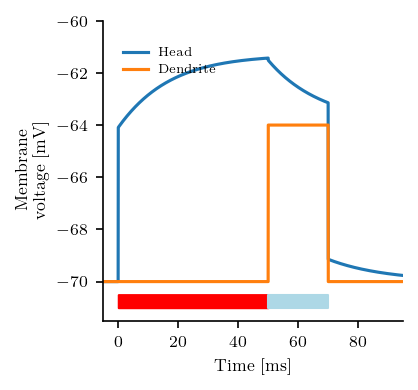

In [26]:
def ax_bAPfollows_comic(fig, pos):
    
    _id = 'experiment_8'
    z_i = 1
    
    (
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(_id)
    
    t = t*1.e3-5
    phi_head = phi[:,1] * 1.e3
    phi_dend = phi[:,-1] * 1.e3
    
    ax = fig.add_axes(pos)
    ax.plot(t,phi_head, label='Head ')
    
    input_time = np.nonzero( np.logical_and(t>0, t<50) )[0]
    ax.fill_between(t[input_time], np.zeros(np.size(input_time))-70.5, np.zeros(np.size(input_time))-71, zorder=-1, color='red',)# label='Synaptic\ninput')
    
    ax.plot(t,phi_dend, label='Dendrite')
    input_time = np.nonzero( np.logical_and(t>50, t<70) )[0]
    ax.fill_between(t[input_time], np.zeros(np.size(input_time))-70.5, np.zeros(np.size(input_time))-71, zorder=-1, color='lightblue',)# label='Dendritic\nDepol.')
    ax.legend(ncol=1, fontsize=6, frameon=False,loc=(0.05, 0.8))
    
    #ax.plot(t[1100],[phi_head[1100]],'kx', ms=5)
    
    ax.set_xlabel('Time [ms]', fontsize=8)
    ax.set_ylabel('Membrane \n voltage [mV]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim((-5,95))
    ax.set_ylim((-71.5,-60))
    
    print(phi_head[1099:1103], phi_head[1101])
    
fig = plt.figure(dpi=150, figsize=(2,2))
ax_bAPfollows_comic(fig, pos=[0,0,1,1])
plt.show()

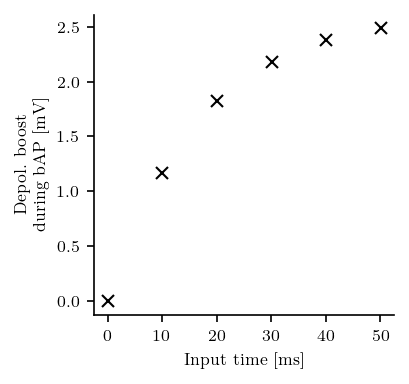

In [27]:
def ax_v_mem_boost_during_bAP(fig,pos):
    
    ax = fig.add_axes(pos)
    
    for _id, _ti in zip(['experiment_'+str(i) for i in range(3,9)], [101 + 200*i for i in range(8)] ):
        z_i = 1

        (
        x,
        a,
        t,
        phi,
        c_Na,
        c_K,
        c_Cl,
        param_set,
        params,
        dx,
        dt,
        r_Na,
        R_Na,
        g_Na_ij,
        r_K,
        R_K,
        g_K_ij,
        r_Cl,
        R_Cl,
        g_Cl_ij,
        r_e,
        R_e,
        g_ij,
        i_c_Na,
        i_c_K,
        i_c_Cl,
        i_e_Na,
        i_e_K,
        i_e_Cl,
        i_e,
        i_c,
        i_total,
        ) = plot.get_results_summary(_id)

        t = t*1.e3-5
        phi_head_boost = (phi[:,1] -phi[:,-1]) * 1.e3
        v_max = phi_head_boost[_ti]
        
        
        ax.plot([t[_ti]], [v_max], 'kx')
        #print(phi_head[_ti], i_max)
        
        ax.set_xlabel('Input time [ms]', fontsize=8)
        ax.set_ylabel('Depol. boost \n during bAP [mV]', fontsize=8)
        ax.tick_params(labelsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #ax.set_xlim((-5,95))
        #ax.set_ylim((-71.5,-60))
    
fig = plt.figure(dpi=150, figsize=(2,2))
ax_v_mem_boost_during_bAP(fig, pos=[0,0,1,1])
plt.show()

-64.00083717068357 -6.866405967073969
-62.83652919367289 -7.277830267829395
-62.17977697228901 -7.517054210150101
-61.81785510635171 -7.651049567920204
-61.62123119985924 -7.72448286431904
-61.51517104935012 -7.764277938751821


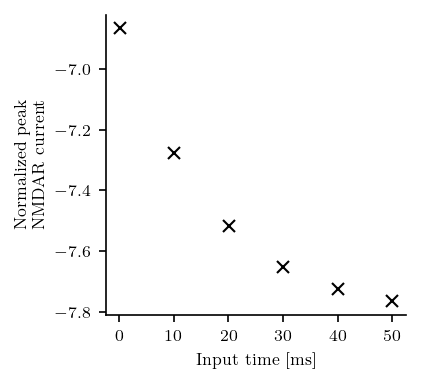

In [28]:
def ax_NMDA_peak_during_bAP(fig,pos):
    
    ax = fig.add_axes(pos)
    
    for _id, _ti in zip(['experiment_'+str(i) for i in range(3,9)], [101 + 200*i for i in range(8)] ):
        z_i = 1

        (
        x,
        a,
        t,
        phi,
        c_Na,
        c_K,
        c_Cl,
        param_set,
        params,
        dx,
        dt,
        r_Na,
        R_Na,
        g_Na_ij,
        r_K,
        R_K,
        g_K_ij,
        r_Cl,
        R_Cl,
        g_Cl_ij,
        r_e,
        R_e,
        g_ij,
        i_c_Na,
        i_c_K,
        i_c_Cl,
        i_e_Na,
        i_e_K,
        i_e_Cl,
        i_e,
        i_c,
        i_total,
        ) = plot.get_results_summary(_id)

        t = t*1.e3-5
        phi_head = phi[:,1] * 1.e3
        v = phi_head[_ti]
        i_max = g_NMDAR_CA1(v) * v 
        
        ax.plot([t[_ti]], [i_max], 'kx')
        print(phi_head[_ti], i_max)
        
        ax.set_xlabel('Input time [ms]', fontsize=8)
        ax.set_ylabel('Normalized peak\n NMDAR current', fontsize=8)
        ax.tick_params(labelsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #ax.set_xlim((-5,95))
        #ax.set_ylim((-71.5,-60))
    
fig = plt.figure(dpi=150, figsize=(2,2))
ax_NMDA_peak_during_bAP(fig, pos=[0,0,1,1])
plt.show()

# TODO
Test for three parameters: R_neck, V_head, I_inj
    
    increased R_neck (a_neck): increases decay time constant, increases head depol
    increased V_head (a_head): decreases concentration changes
    increased I_inj (g_syn): increases concentration changes
    
Tip: set bAP volatage comparable to EPSP voltage otherwise i_NMDA will be mainly set by bAP-depol

    a_neck = {15,25,35,45,55}
    a_head = {150,250,350,450}
    g_syn = {10,20,25,30,40,50}

[-61.43249952 -61.43209804 -61.51517105 -61.52382942] -61.51517104935012


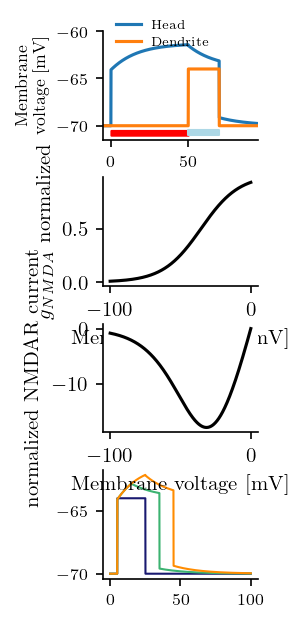

In [35]:

def ax_head_var(fig, pos, experiment_ids, var='phi', y_label=None, x_label=None, y_lim=None, x_lim=None, y_ticks=None, x_ticks=None):
    colors = [ 'midnightblue','mediumseagreen', 'darkorange']
    ax = fig.add_axes(pos)
    
    for col, _id in zip(colors, experiment_ids):
         
        (x,a,t,phi,
        c_Na,c_K,c_Cl,
        param_set,params,
        dx,dt,
        r_Na,R_Na,g_Na_ij,r_K,R_K,g_K_ij,r_Cl,R_Cl,g_Cl_ij,r_e,R_e,g_ij,
        i_c_Na,i_c_K,i_c_Cl,i_e_Na,i_e_K,i_e_Cl,i_e,i_c,i_total,
        ) = plot.get_results_summary(_id)
        cum_R = np.cumsum(1./g_ij, axis=1)
        
        if var == 'phi':
            y_data = phi[:,1]*1.e3
        elif var =='i_total':
            y_data = i_total[:,1]*1.e12, 
        elif var == 'c_Na':    
            y_data = c_Na[:,1]
        elif var == 'c_K':    
            y_data = c_K[:,1]
        elif var == 'c_Cl':    
            y_data = c_Cl[:,1]
        elif var == 'cum_R':
            y_data = cum_R[:,-1]/cum_R[0,-1]
        
        ax.plot(t*1.e3, y_data, color=col, lw=1)
        
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if y_label == True:
        ax.set_ylabel(y_label, fontsize=8)
    else: 
        ax.set_ylabel('')
    if x_label:
        ax.set_xlabel(x_label, fontsize=8)
    else: 
        ax.set_xlabel('')
        

fig = plt.figure(dpi=150, figsize=(3.75, 5))

n_columns = 3
n_rows = 5


# all in unit inch

fig_width = 5.0
fig_height = fig_height = 7.0
dx = 0.8
dy = dx
wx = (fig_width - n_columns * dx - 0.5 * dx) / n_columns
wy = (fig_height  - n_rows * dy - 0.5 * dy - leg_h) / n_rows



# relativie coords 
x_min = [(dx + n*(wx+dx))/fig_width for n in range(n_columns) ]
y_min = [(dy + n*(wy+dy))/fig_height for n in range(n_rows) ]
wx_r = wx/fig_width
wy_r = wy/fig_height

pos1 = [x_min[0], y_min[4], wx_r, wy_r]
pos2 = [x_min[1], y_min[4], wx_r, wy_r]
pos3 = [x_min[2], y_min[4], wx_r, wy_r]
pos4 = [x_min[0], y_min[3], wx_r, wy_r]
pos5 = [x_min[1], y_min[3], wx_r, wy_r]
pos6 = [x_min[2], y_min[3], wx_r, wy_r]
pos7 = [x_min[0], y_min[2], wx_r, wy_r]
pos8 = [x_min[1], y_min[2], wx_r, wy_r]
pos9 = [x_min[2], y_min[2], wx_r, wy_r]
pos1 = [x_min[0], y_min[1], wx_r, wy_r]
pos2 = [x_min[1], y_min[1], wx_r, wy_r]
pos3 = [x_min[2], y_min[1], wx_r, wy_r]
pos4 = [x_min[0], y_min[0], wx_r, wy_r]
pos5 = [x_min[1], y_min[0], wx_r, wy_r]
pos6 = [x_min[2], y_min[0], wx_r, wy_r]


pos = pos = [x_min, y_min[3], wx, wy]
ax_head_var(fig, pos, experiment_ids=['experiment_3', 'experiment_4','experiment_5',], var='phi')

#####################
pos = [x_min, y_min[0], wx, wy]
ax_bAPfollows_comic(fig, pos)
#####################

#####################
pos = [x_min, y_min[1], wx, wy]
ax_g_NMDAR(fig, pos, 0.073, -0.074)

#####################
pos = [x_min, y_min[2], wx, wy]
ax_NMDAR_current(fig, pos, 0.073, -0.074)

#####################

#####################


plt.show()


# Figure 4
    A-E) First input current for 10 ms then depolarisation of dendrite.
    F-J) First depolarization of dendrite for 10 ms then input current for 10 ms.
    K) Input current time gets increased and max depol during dendritc depol. gets measured (explanation figure)
    L) COnductivity of NMDARs as function of voltage
    M) Normalized NMDAR-current as function of voltage
    N) NMDAR-current peak during 10 ms dendritc depol as function of previous input current time
    O) Summed NMDAR-current uring 10 ms dendritc depol as function of previous input current time